# Tables: Part 1


### Table of Contents

1. <a href='#section 2'>Tables</a>

    a. <a href='#subsection 2a'>Attributes</a>

    b. <a href='#subsection 2b'>Transformations</a><br><br>

2. <a href='#section 3'>Coming Soon...</a>

In [6]:
# dependencies: THIS CELL MUST BE RUN
from datascience import *
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import ipywidgets as widgets
%matplotlib inline

## 1. Tables <a id='section 2'></a>

The last section covered four basic concepts of python: data, expressions, names, and functions. In this next section, we'll see just how much we can do to examine and manipulate our data with only these minimal Python skills.

**Tables** are fundamental ways of organizing and displaying data. Run the next cell to load the data.

In [7]:
ratings = Table.read_table("data/imdb_ratings.csv")
ratings

Votes,Rank,Title,Year,Decade
88355,8.4,M (1931),1931,1930
132823,8.3,Singin' in the Rain (1952),1952,1950
74178,8.3,All About Eve (1950),1950,1950
635139,8.6,Léon (1994),1994,1990
145514,8.2,The Elephant Man (1980),1980,1980
425461,8.3,Full Metal Jacket (1987),1987,1980
441174,8.1,Gone Girl (2014),2014,2010
850601,8.3,Batman Begins (2005),2005,2000
37664,8.2,Judgment at Nuremberg (1961),1961,1960
46987,8,Relatos salvajes (2014),2014,2010


This table is organized into **columns**: one for each *category* of information collected:

You can also think about the table in terms of its **rows**. Each row represents all the information collected about a particular instance, which can be a person, location, action, or other unit. 

What do the rows in this table represent?

By default only the first ten rows are shown. Can you see how many rows there are in total?

### 2a. Table Attributes <a id='subsection 2a'></a>

Every table has **attributes** that give information about the table, like the number of rows and the number of columns. Table attributes are accessed using the dot method. But, since an attribute doesn't perform an operation on the table, there are no parentheses (like there would be in a call expression).

Attributes you'll use frequently include `num_rows` and `num_columns`, which give the number of rows and columns in the table, respectively.

In [8]:
# get the number of columns
ratings.num_columns

5

<div class="alert alert-warning">
<b>PRACTICE:</b> Use `num_rows` to get the number of rows in our table.
</div>

In [9]:
# get the number of rows in the table


### 2b. Table Transformation <a id='subsection 2b'></a>

Not all of our columns are relevant to every question we want to ask. We can save computational resources and avoid confusion by *transforming* our table before we start work.

#### Subsetting columns with `select` and `drop`
The `select` function is used to get a table containing only particular columns. `select` is called on a table using dot notation and takes one or more arguments: the name or names of the column or columns you want.

In [10]:
# make a new table with only selected columns
ratings.select("Votes", "Title")

Votes,Title
88355,M (1931)
132823,Singin' in the Rain (1952)
74178,All About Eve (1950)
635139,Léon (1994)
145514,The Elephant Man (1980)
425461,Full Metal Jacket (1987)
441174,Gone Girl (2014)
850601,Batman Begins (2005)
37664,Judgment at Nuremberg (1961)
46987,Relatos salvajes (2014)


If instead you need all columns except a few, the `drop` function can get rid of specified columns. `drop` works very similarly to `select`: call it on the table using dot notation, then give it the name or names of what you want to drop.

In [11]:
# drop a column
ratings.drop("Decade")

Votes,Rank,Title,Year
88355,8.4,M (1931),1931
132823,8.3,Singin' in the Rain (1952),1952
74178,8.3,All About Eve (1950),1950
635139,8.6,Léon (1994),1994
145514,8.2,The Elephant Man (1980),1980
425461,8.3,Full Metal Jacket (1987),1987
441174,8.1,Gone Girl (2014),2014
850601,8.3,Batman Begins (2005),2005
37664,8.2,Judgment at Nuremberg (1961),1961
46987,8,Relatos salvajes (2014),2014


<div class="alert alert-warning">
<b>PRACTICE:</b> Pick two columns from our table. Create a new table containing only those two columns two different ways: once using `select` and once using `drop`. 
</div>

In [12]:
# use select
...

In [13]:
# use drop
...

#### Filtering rows with `where`
Some analysis questions only deal with a subset of rows.

The **`where`** function allows us to choose certain rows based on two arguments:
- A column label
- A condition that each row should match, called the _predicate_ 

In other words, we call the `where` function like so: `table_name.where(column_name, predicate)`.


In [14]:
# get a subset of rows
ratings.where("Decade", are.equal_to(1950))

Votes,Rank,Title,Year,Decade
132823,8.3,Singin' in the Rain (1952),1952,1950
74178,8.3,All About Eve (1950),1950,1950
156432,8.3,Some Like It Hot (1959),1959,1950
56671,8,The Killing (1956),1956,1950
87437,8,Roman Holiday (1953),1953,1950
65408,8.1,Touch of Evil (1958),1958,1950
90434,8.3,Rashômon (1950),1950,1950
42446,8,La strada (1954),1954,1950
198795,8.4,North by Northwest (1959),1959,1950
123879,8.5,Sunset Blvd. (1950),1950,1950


There are many types of predicates, but some of the more common ones are:

|Predicate|Example|Result|
|-|-|-|
|`are.equal_to`|`are.equal_to(50)`|Find rows with values equal to 50|
|`are.not_equal_to`|`are.not_equal_to(50)`|Find rows with values not equal to 50|
|`are.above`|`are.above(50)`|Find rows with values above (and not equal to) 50|
|`are.above_or_equal_to`|`are.above_or_equal_to(50)`|Find rows with values above 50 or equal to 50|
|`are.below`|`are.below(50)`|Find rows with values below 50|
|`are.between`|`are.between(2, 10)`|Find rows with values above or equal to 2 and below 10|


In [15]:
# example 2: get a subset of rows
ratings.where("Rank", are.above(8.7))

Votes,Rank,Title,Year,Decade
1027398,9.2,The Godfather (1972),1972,1970
1498733,9.2,The Shawshank Redemption (1994),1994,1990
447875,8.9,"Il buono, il brutto, il cattivo (1966)",1966,1960
1473049,8.9,The Dark Knight (2008),2008,2000
1177098,8.8,Fight Club (1999),1999,1990
692753,9,The Godfather: Part II (1974),1974,1970
384187,8.9,12 Angry Men (1957),1957,1950
1074146,8.9,The Lord of the Rings: The Return of the King (2003),2003,2000
761224,8.9,Schindler's List (1993),1993,1990
1099087,8.8,The Lord of the Rings: The Fellowship of the Ring (2001),2001,2000


<div class="alert alert-warning">
<b> PRACTICE:</b> Describe what happened in each of the two examples above. Which rows were filtered out? Give an example where we would want to use those filters for analysis.
</div>

**YOUR RESPONSE HERE**

## 3. Coming up... Visualizations<a id='section 3'></a>

Knowing these few basic concepts about Python and Tables will help you interact with data in upcoming parts of the module. Here's a preview of the kinds of visualizations and operations coming up:

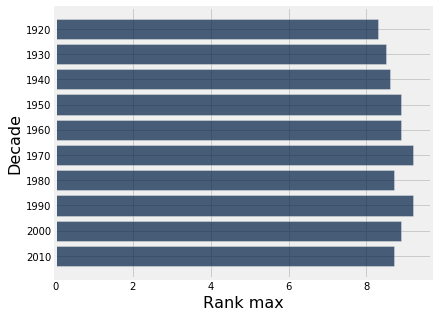

In [16]:
# make a bar plot of the max rank per decade
ratings.select("Rank", "Decade").group("Decade", max).barh("Decade")

In [17]:
# make many bar plots showing feature averages per decade
def avg_by_decade(feature):
    return ratings.select(feature, "Decade").group("Decade", np.average).barh("Decade")

# create the slider sfor the widget
buttons = widgets.ToggleButtons(options=["Rank", "Votes"])

# create the widget to view plots for different parameter values
display(widgets.interactive(avg_by_decade, feature=buttons))

interactive(children=(ToggleButtons(description='feature', options=('Rank', 'Votes'), value='Rank'), Output())…

In [18]:
# load the Capital bike-sharing data set
bikes = Table.read_table("data/day_renamed.csv")
bikes

instant,date,season,year,month,is holiday,day of week,is work day,weather,temp,felt temp,humidity,windspeed,casual,registered,total riders
1,2011-01-01,1:spring,0,1,0,6:saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1:spring,0,1,0,0:sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1:spring,0,1,0,1:monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1:spring,0,1,0,2:tuesday,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1:spring,0,1,0,3:wednesday,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600
6,2011-01-06,1:spring,0,1,0,4:thursday,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606
7,2011-01-07,1:spring,0,1,0,5:friday,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
8,2011-01-08,1:spring,0,1,0,6:saturday,0,2,0.165,0.162254,0.535833,0.266804,68,891,959
9,2011-01-09,1:spring,0,1,0,0:sunday,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822
10,2011-01-10,1:spring,0,1,0,1:monday,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


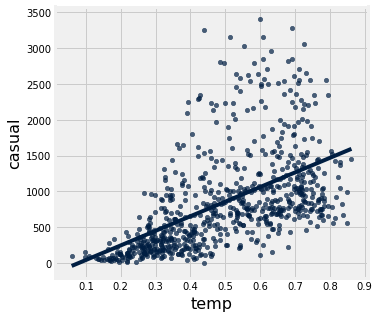

In [19]:
# look at the correlation between temperature and casual rider numbers
bikes.select("casual", "temp").scatter("temp", fit_line=True)

In [20]:
# compare scatter plots for casual and registered riders for different predictor variables
def scatter_bikes(predictor, response, fit_line):
    if response == "both":
        b = bikes.select("registered", "casual", predictor)
    else:
        b = bikes.select(response, predictor)
    return b.scatter(predictor, fit_line=fit_line)

# create the slider sfor the widget
predict_widget = widgets.Dropdown(options=["humidity", "windspeed", "temp"],
                         value="humidity")
response_widget = widgets.Dropdown(options=["casual", "registered", "both"],
                         value="casual")
fitline_widget = widgets.Dropdown(options=[True, False],
                          value=False)

# create the widget to view plots for different parameter values
display(widgets.interactive(scatter_bikes, predictor=predict_widget, response=response_widget, fit_line=fitline_widget))

interactive(children=(Dropdown(description='predictor', options=('humidity', 'windspeed', 'temp'), value='humi…

#### References

- Sections of "Intro to Jupyter", "Table Transformation" adapted from materials by Kelly Chen and Ashley Chien in [UC Berkeley Data Science Modules core resources](http://github.com/ds-modules/core-resources)
- "A Note on Errors" subsection and "error" image adapted from materials by Chris Hench and Mariah Rogers for the Medieval Studies 250: Text Analysis for Graduate Medievalists [data science module](https://github.com/ds-modules/MEDST-250).
- Rocket Fuel data and discussion questions adapted from materials by Zsolt Katona and Brian Bell, BerkeleyHaas Case Series

Author: Keeley Takimoto